Data Analysis in Astronomy and Physics (SoSe22)


**Exercise Set 4**

Submission by: Mahak Sadhwani, Xiongxiao Wang, Sakshi Pahujani

Due: **10:00 2 May 2022**  
Discussion: **13:00 6 May 2**  
**Online submission** at via in the directory Exercises / Übungen -\>
Submission of Exercises / Rückgabe des Übungsblät



**1. Samples & Sampling Simulation \[60 points\]**

Write a numerical simulation code that reproduces the behaviour of the
following simulation. Draw N samples of size n from a population with
*µ* = 5 and *σ* = 1. Compute the confidence intervals (CI) of each
sample distribution and the sampling distribution and visualize it in a
similar manner. Test your simulation against your theoretical
expectations. Make sure to test your result and to confirm that the
result is as expected. (i.e. About 5 % of the samples not overlapping
with the confidence interval, or 5% of all simulations with the
population mean not part of the confidence interval.) **60 Points**



>According to the question, we draw N=100 samples of size n=40 from a normal distribution with $\mu =5$ and $\sigma = 1$ by function **data = np.random.normal(mu,sigma,(N,n))** .

1.959963984540054


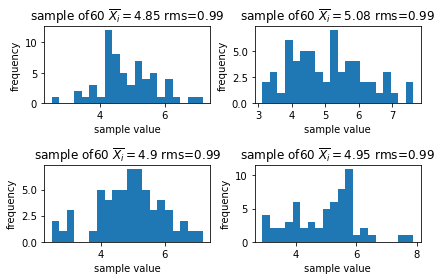

In [1]:
import numpy as np
import array
from scipy.stats import norm
import matplotlib.pyplot as plt
from math import sqrt

mu, sigma = 5,1
N, n=100, 60
confidence = 0.95
z_value = np.abs(norm.ppf((1-confidence)/2))
print(z_value)
CI=[]
data = np.random.normal(mu,sigma,(N,n))
f,a = plt.subplots(2,2)
a = a.ravel()
sample_means=[]
for idx,ax in enumerate(a) :   
    m = data[idx].mean()
    s = data.std()
    CI.append((m-s*z_value/sqrt(n),m+s*z_value/sqrt(n)))
    sample_means.append(m)
    ax.hist(data[idx],bins=20)
    ax.set_title('sample of'+str(n)+' $\overline{X_i}=$'+str(round(m,2))+' rms='+str(round(s,2)))
    ax.set_xlabel('sample value')
    ax.set_ylabel('frequency')
for idx in range(4,N):
    m = data[idx].mean()
    s = data.std()
    CI.append((m-s*z_value/sqrt(n),m+s*z_value/sqrt(n)))
    sample_means.append(m)
    
plt.tight_layout()

The figures above are the first four examples of sample distribution of size 60,$\overline{X_i} \approx \mu = 5, rms \approx \sigma =1$ ,which confirm that the result is as expected

In [2]:
samples_means=np.array(sample_means)

>To find the sampling distribution, we use the means of 100 samples above as sample and calculate the mean and standard error of sampling distribution.

The formula to calculate mean and standard error of sampling distribution is$$mean(\overline{X_i})=\sum \frac {\overline{X_i}}{N}$$ $$SE(standard error)=\sqrt{\sum {\frac {(\overline{X_i}-mean(\overline{X_i}))^2}{N}}}$$

mean of sampling distribution:  4.989380753905012 
Std. error of sampling distribution:  0.1256542604805126


Text(0, 0.5, 'frequency')

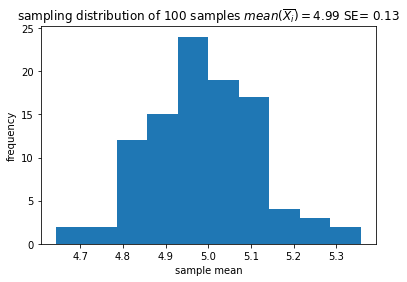

In [3]:
plt.hist(samples_means,bins=10)
print("mean of sampling distribution: ", samples_means.mean(),"\nStd. error of sampling distribution: ",samples_means.std())
sampling_mean= samples_means.mean()
sampling_std= samples_means.std()
plt.title('sampling distribution of '+str(N)+' samples $mean(\overline{X_i})=$'+str(round(sampling_mean,2))+' SE= '+str(round(sampling_std,2)))
plt.xlabel('sample mean')
plt.ylabel('frequency')

The figure above is sampling distribution, the sampling distribution $mean(\overline{X_i}) \approx \mu$, and $SE \ll \sigma$



>To calculate the confidence intervals (CI) of each sample distribution, we set confidence =0.95,

Step 1: Subtract 1 from your sample size. 60 – 1 = 59. This gives you degrees of freedom, which you’ll need in step 3.

Step 2: Subtract the confidence level from 1, then divide by two.
(1 – .95) / 2 = 0.025

Step 3: use the function **np.abs(t.ppf((1-confidence)/2),dof)** to calculate the $t$. For 39 degrees of freedom (df) and α = 0.025, my result t is 2.00099537704821.

step 4: to calculate the confidence interval, we need to use the formula $\overline{X}\pm t \frac{s}{\sqrt{n}} $, where s is standard deviation of each sample and n is the size of sample. The corresponding function is CI.append((m-s$*$z_value/sqrt(n),m+s$*$z_value/sqrt(n)))

In [4]:
CI.append((mu-sqrt(sigma)*z_value/sqrt(n),mu+sqrt(sigma)*z_value/sqrt(n))) #theoretical expectations of confidence interval
samples_means=np.append(samples_means,5)
#CI

The results above is confidence interval of 100 samples.

>To calculate the confidence intervals (CI) of the sampling distribution, we set confidence =0.95,

Step 1: Subtract 1 from your sample size. 100 – 1 = 99. This gives you degrees of freedom, which you’ll need in step 3.

Step 2: Subtract the confidence level from 1, then divide by two.
(1 – .95) / 2 = 0.025

Step 3: use the function **np.abs(norm.ppf((1-confidence)/2))** to calculate the $t$. For 99 degrees of freedom (df) and α = 0.025, my result t is 1.9842169515086827.

step 4: to calculate the confidence interval, we need to use the formula $\overline{X}\pm t \frac{s}{\sqrt{N}} $, where s is standard deviation of samplind distribution and N is the total number of samples. 

In [5]:
c = np.abs(norm.ppf((1-confidence)/2))
print(c)
print(c*np.sqrt(sampling_std)/np.sqrt(100))
CI_sampling = (sampling_mean+ c*np.sqrt(sampling_std)/np.sqrt(100), sampling_mean - c*np.sqrt(sampling_std)/np.sqrt(100))
print("Confidence interval of sampling distribution : ", CI_sampling)

1.959963984540054
0.06947630295868241
Confidence interval of sampling distribution :  (5.058857056863694, 4.91990445094633)


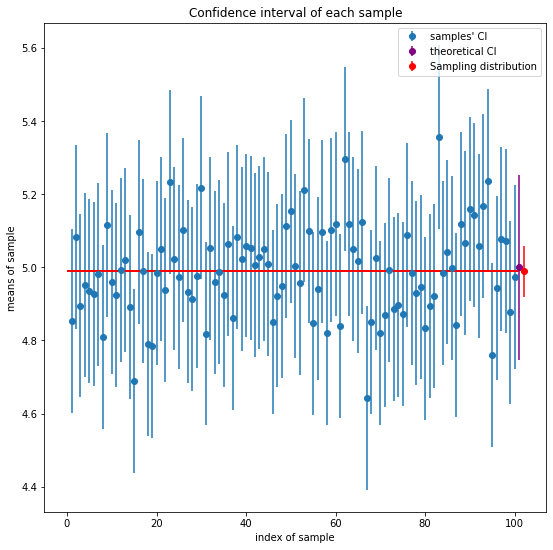

In [6]:
plt.figure(figsize=(9,9))
plt.title('Confidence interval of each sample')
plt.xlabel('index of sample')
plt.ylabel('means of sample')
plt.errorbar(x=np.arange(1,N+1),
             y=samples_means[:-1], 
             yerr=[(top-bot)/2 for top,bot in CI[:-1]],
             fmt='o', label="samples' CI")
plt.errorbar(x=101, y=samples_means[-1], yerr=(CI[-1][0]-CI[-1][1])/2, fmt='o', color="purple", label="theoretical CI")
plt.errorbar(x=102, y = sampling_mean, yerr=[CI_sampling[0]/2-CI_sampling[1]/2], fmt='o', color="red", label="Sampling distribution")
plt.hlines(xmin=0, xmax=N+1,
          y=data.mean(), 
          linewidth=2.0,
          color="red");
plt.legend()

The figure above is the confidence interval of 100 samples, which blue line is the confidence interval of the sample and blue dots is the mean of the sample. Red line is the mean of sampling distribution. 

**The magenta line is theoretical confidence interval.** Compare the theoretical CI with the samples' CI, the result is as expected.

**The red line is the confidence interval of the sampling distribution.**

In order to verify our results, we check how many samples have their means outside the theoretical value of confidence interval and we see that roughly 3-5 out of our 100 samples comply with this criteria. If we increase our collected sample space this approximation moves closer to 5% of the samples. This indicates that 95% of our samples have means within the confidence interval hence verifyng the calculation.

In [7]:
count=0
print(CI[-1])
for i in sample_means:
    if(i<CI[-1][0] or i>CI[-1][1]):
        count+=1        #increase count if mean is greater than upper cap or less than lower cap of confidence interval
print("Number of samples with mean value lying outside the theoretical confidence interval = ",count)

(4.746969737623668, 5.253030262376332)
Number of samples with mean value lying outside the theoretical confidence interval =  4


**2. Poisson statistics \[40 points\]**

Perseids are a meteor showers associated with the comet Swift–Tuttle. In
astronomy, the zenithal hourly rate (ZHR) of a meteor shower is the
number of meteors a single observer would see in an hour of peak
activity. Assume that today the Perseids have a ZHR = 120. Assume that
the occurrence of every single meteor is distributed according to
Poisson statistics.

**a.** Find the probability that no meteor is observed during a given
minute **10 Points**  

The occurence of every single meteor obey Poisson distribution,$$P(x)=\frac {\mu ^{x}.e ^{- \mu}}{x!}$$.The mean number in one minute $\mu = \frac{120}{60} = 2$ , so the probability that no meteor is observed during one minute $P(0)=\frac{2^{0}.e^{-2}}{0!}$ = 0.1353

**b.** What is the expected number of meteors occurring in two minutes
**10 Points**  

The expected number of meteors in two minutes,$<x> = \frac{120\times 2}{60}=4$

**c.** Find the probability that this expected number actually are
observed in a given two-minute period. **10 Points**  

The probability that 4 meteors are observed in a given two-minute $P(4)=\frac{4^{4}.e^{-4}}{4!}=0.1953$

**d.** Plot a histogram of the probabilities for the number of meteors
for each 2 minute period. **10 Points**

k-value 0 has probability = 0.01832
k-value 1 has probability = 0.07326
k-value 2 has probability = 0.14653
k-value 3 has probability = 0.19537
k-value 4 has probability = 0.19537
k-value 5 has probability = 0.15629
k-value 6 has probability = 0.1042
k-value 7 has probability = 0.05954
k-value 8 has probability = 0.02977
k-value 9 has probability = 0.01323
k-value 10 has probability = 0.00529
k-value 11 has probability = 0.00192
k-value 12 has probability = 0.00064
k-value 13 has probability = 0.0002
k-value 14 has probability = 6e-05
k-value 15 has probability = 2e-05
k-value 16 has probability = 0.0


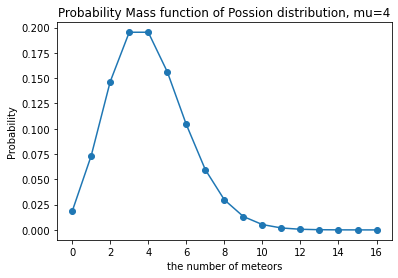

In [8]:
from scipy.stats import poisson
k = np.arange(0, 17)
pmf = poisson.pmf(k, mu=4)
pmf = np.round(pmf, 5)
for val, prob in zip(k,pmf):
    print(f"k-value {val} has probability = {prob}")
plt.plot(k, pmf, marker='o')
plt.xlabel('the number of meteors')
plt.ylabel('Probability')
plt.title('Probability Mass function of Possion distribution, mu=4')

plt.show()

Text(0, 0.5, 'Probability')

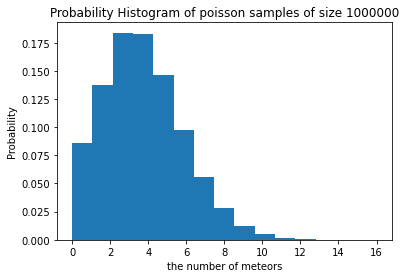

In [9]:
rvs = poisson.rvs(4,size=1000000)
fig, ax = plt.subplots(1, 1)
ax.hist(rvs,bins=15,range=(0,16),density=1)
plt.title('Probability Histogram of poisson samples of size 1000000')
plt.xlabel('the number of meteors')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

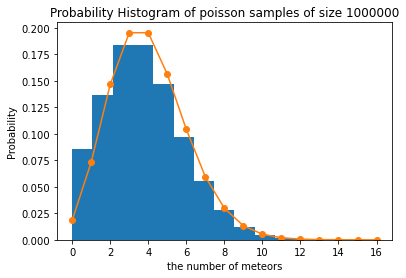

In [10]:
rvs = poisson.rvs(4,size=1000000)
fig, ax = plt.subplots(1, 1)
ax.hist(rvs,bins=15,range=(0,16),density=1)
plt.title('Probability Histogram of poisson samples of size 1000000')
k = np.arange(0, 17)
pmf = poisson.pmf(k, mu=4)
pmf = np.round(pmf, 5)

plt.plot(k, pmf, marker='o')
plt.xlabel('the number of meteors')
plt.ylabel('Probability')
